In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

In [2]:
df=pd.read_csv('BTCUSDT-1h.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381 entries, 0 to 4380
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4381 non-null   object 
 1   open       4381 non-null   float64
 2   high       4381 non-null   float64
 3   low        4381 non-null   float64
 4   close      4381 non-null   float64
 5   volume     4381 non-null   float64
dtypes: float64(5), object(1)
memory usage: 205.5+ KB


In [8]:
df['Price Change']=df['close'] - df['open']
df['Volatility']=df['high'] - df['low']/ df['open']
df['Rolling_Mean_Close']=df['close'].rolling(window=5).mean()
df['Rolling_Std_Close']=df['close'].rolling(window=5).std()

In [ ]:
df['Target_Close']=df['close'].shift(-1)
df['Target_Movement']=(df['close'].shift(-1)>df['close']).astype(int)

In [77]:
df['vol_1h'] = df['high'] - df['low']
df['vol_1h_next'] = df['vol_1h'].shift(-1)
median_vol = df['vol_1h_next'].median()
df['vol_regime'] = (df['vol_1h_next'] > median_vol).astype(int)

window = 6
df['vol_mean_6h'] = df['vol_1h'].rolling(window).mean()
df['vol_std_6h']  = df['vol_1h'].rolling(window).std()
df['vol_max_6h']  = df['vol_1h'].rolling(window).max()
df['vol_min_6h']  = df['vol_1h'].rolling(window).min()

df['return_1h'] = df['close'].pct_change().shift(-1)
df['return_mean_6h'] = df['return_1h'].rolling(window).mean()
df['return_std_6h'] = df['return_1h'].rolling(window).std()

In [84]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y:%m:%d %H:%M:%S')

In [85]:
df = df.sort_values('timestamp')

In [86]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['day'] = df['timestamp'].dt.day

In [87]:
print(df.isnull().sum())

timestamp             0
open                  0
high                  0
low                   0
close                 0
volume                0
Price Change          0
Volatility            0
Rolling_Mean_Close    0
Rolling_Std_Close     0
Target_Close          0
Target_Movement       0
date                  0
vol_1h                0
vol_1h_next           0
vol_regime            0
vol_mean_6h           0
vol_std_6h            0
vol_max_6h            0
vol_min_6h            0
return_1h             0
return_mean_6h        0
return_std_6h         0
hour                  0
dayofweek             0
day                   0
dtype: int64


In [88]:
df.dropna(inplace=True)

In [89]:
df.head()

,timestamp,open,high,low,close,volume,Price Change,Volatility,Rolling_Mean_Close,Rolling_Std_Close,...,vol_mean_6h,vol_std_6h,vol_max_6h,vol_min_6h,return_1h,return_mean_6h,return_std_6h,hour,dayofweek,day
14,2021-04-19 19:00:00,55635.03,56100.00,55387.25,55930.94,2219.5842,295.91,56099.004454,55269.572,557.943832,...,1031.300000,381.238780,1561.71,526.18,0.003559,0.002097,0.008863,19,0,19
15,2021-04-19 20:00:00,55930.94,56410.00,55750.00,56130.02,2160.1990,199.08,56409.003235,55578.532,509.891403,...,881.015000,299.242535,1253.72,526.18,0.002052,0.005008,0.002654,20,0,19
16,2021-04-19 21:00:00,56130.02,56600.00,55678.63,56245.20,1789.1079,115.18,56599.008042,55862.174,359.626159,...,825.623333,241.677703,1202.33,526.18,-0.004474,0.003524,0.004724,21,0,19
17,2021-04-19 22:00:00,56245.20,56348.05,55795.95,55993.56,1428.6766,-251.64,56347.057987,55986.950,231.403644,...,717.251667,175.773237,931.11,526.18,-0.006437,0.000802,0.005015,22,0,19
18,2021-04-19 23:00:00,55993.56,56199.74,55517.45,55633.14,2192.8000,-360.42,56198.748503,55986.572,232.122651,...,675.781667,141.173312,921.37,526.18,-0.018008,-0.002998,0.008683,23,0,19


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4364 entries, 14 to 4377
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           4364 non-null   datetime64[ns]
 1   open                4364 non-null   float64       
 2   high                4364 non-null   float64       
 3   low                 4364 non-null   float64       
 4   close               4364 non-null   float64       
 5   volume              4364 non-null   float64       
 6   Price Change        4364 non-null   float64       
 7   Volatility          4364 non-null   float64       
 8   Rolling_Mean_Close  4364 non-null   float64       
 9   Rolling_Std_Close   4364 non-null   float64       
 10  Target_Close        4364 non-null   float64       
 11  Target_Movement     4364 non-null   int64         
 12  date                4364 non-null   object        
 13  vol_1h              4364 non-null   float64       
 

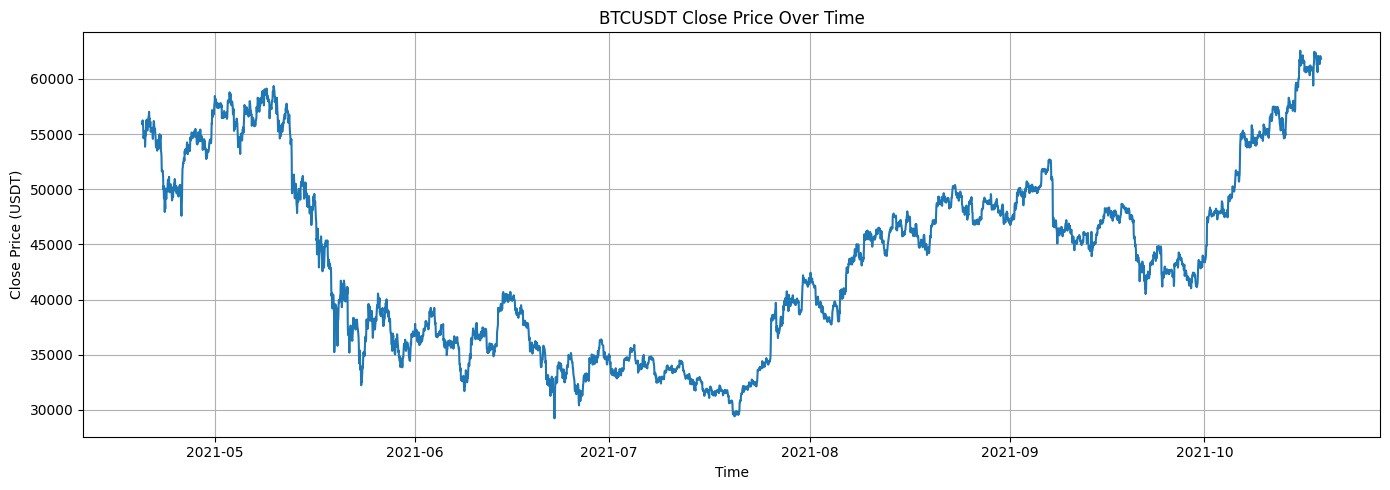

In [91]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='timestamp', y='close')
plt.title("BTCUSDT Close Price Over Time")
plt.xlabel("Time")
plt.ylabel("Close Price (USDT)")
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Close Prices')

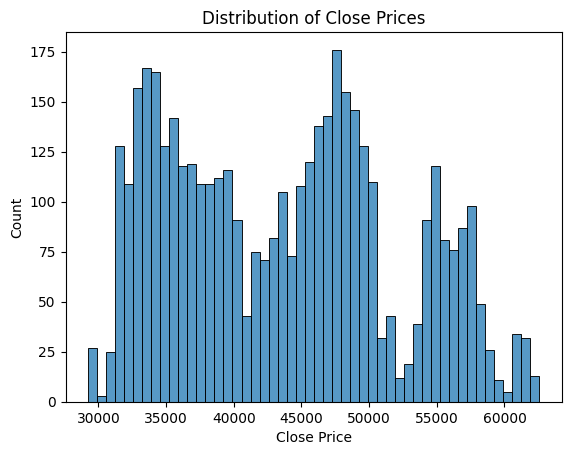

In [92]:
sns.histplot(df['close'], bins=50)
plt.xlabel('Close Price')
plt.title("Distribution of Close Prices")

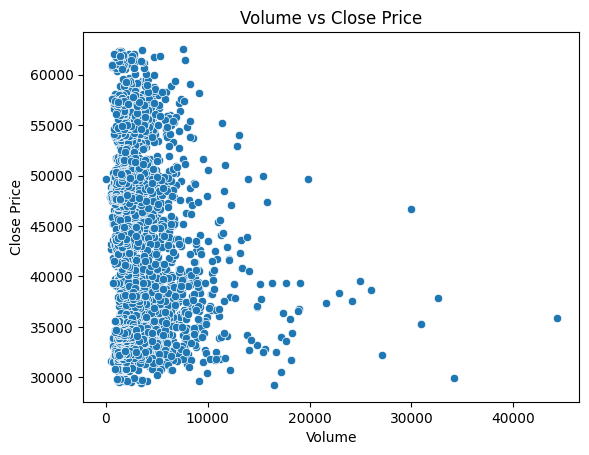

In [93]:
sns.scatterplot(x='volume', y='close', data=df)
plt.title('Volume vs Close Price')
plt.xlabel('Volume')    
plt.ylabel('Close Price')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

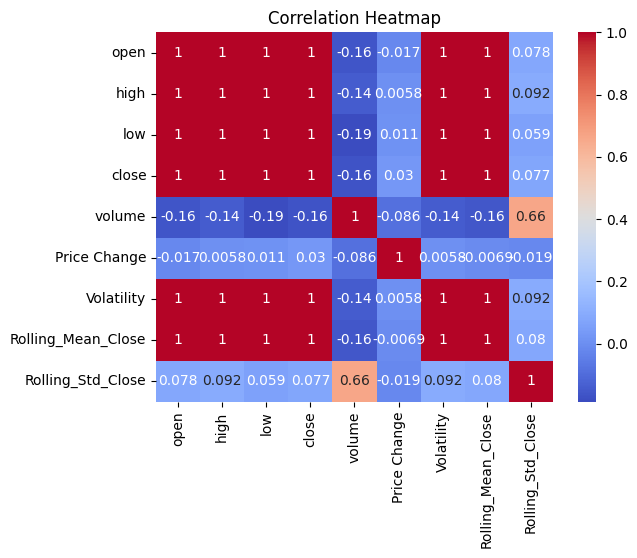

In [18]:
sns.heatmap(df[['open', 'high', 'low', 'close', 'volume', 'Price Change', 'Volatility', 'Rolling_Mean_Close', 'Rolling_Std_Close']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

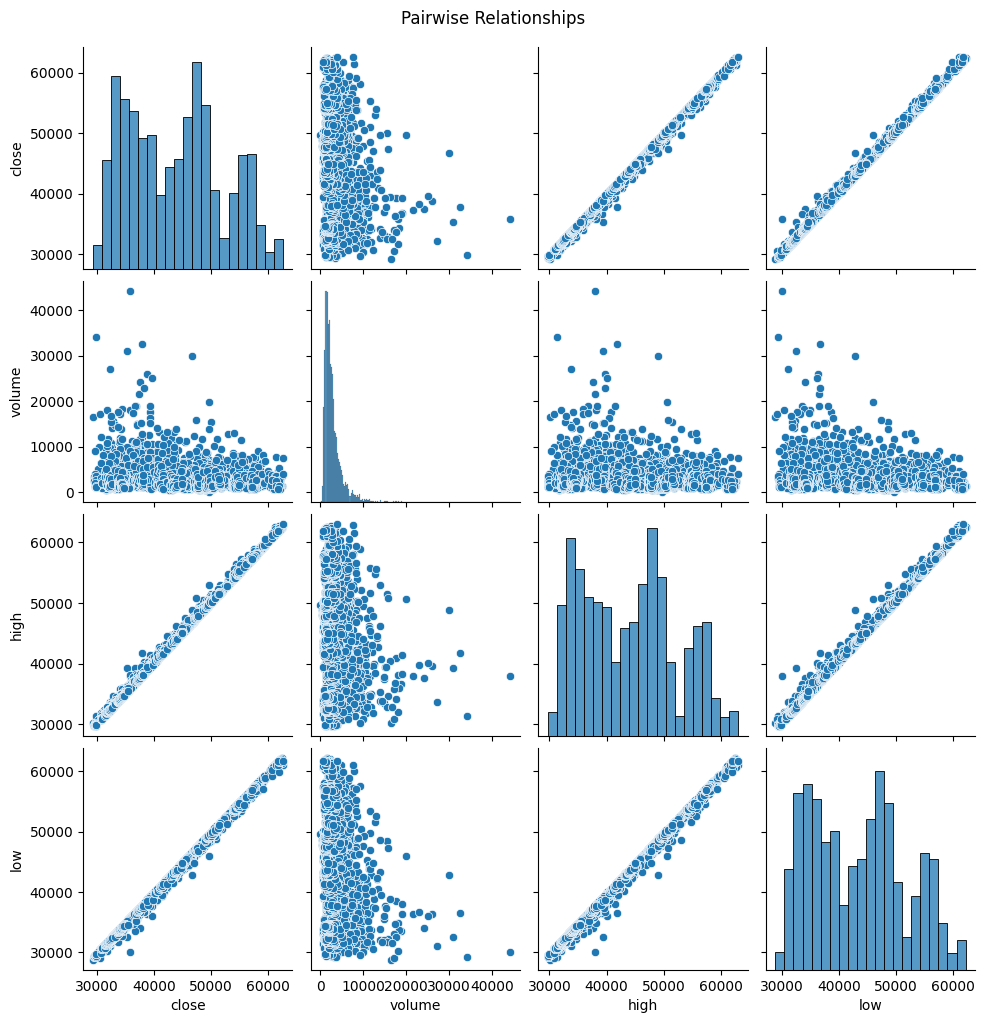

In [19]:
sns.pairplot(df[['close', 'volume', 'high', 'low']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [94]:
df.duplicated().sum()

np.int64(0)

MODEL 1(Target_Close)

In [98]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [100]:
features = [
    'open', 'high', 'low', 'close', 'volume',
    'Price Change', 'Volatility',
    'Rolling_Mean_Close', 'Rolling_Std_Close',
    'hour', 'dayofweek', 'day'
]
X = df[features]
y = df['Target_Close']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [104]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔹 Mean Absolute Error: {mae:.4f}")
print(f"🔹 Mean Squared Error: {mse:.4f}")
print(f"🔹 R² Score: {r2:.4f}")

🔹 Mean Absolute Error: 265.6502
🔹 Mean Squared Error: 151272.9552
🔹 R² Score: 0.9979


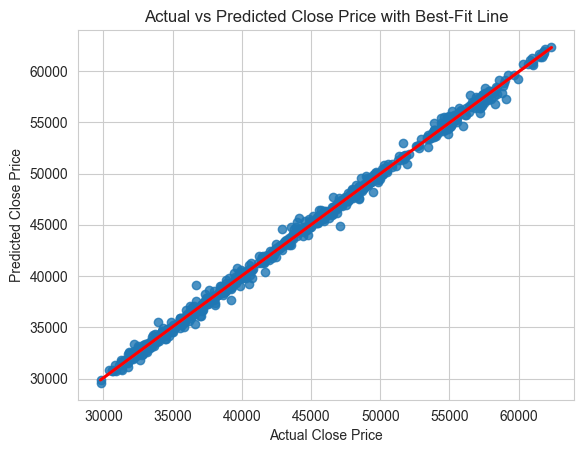

In [119]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price with Best-Fit Line")
plt.show()

In [106]:
r2_scores = []
degrees = [1, 2, 3, 4]

In [107]:
for d in degrees:
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d, include_bias=False)),
        ("scale", StandardScaler()),
        ("lr", LinearRegression())
    ])
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    r2_scores.append({
        "degree": d,
        "r2_score": r2_score(y_test, pred)
    })

In [108]:
r2_df = pd.DataFrame(r2_scores)
print(r2_df)

   degree  r2_score
0       1  0.997922
1       2  0.997865
2       3  0.991445
3       4  0.519649


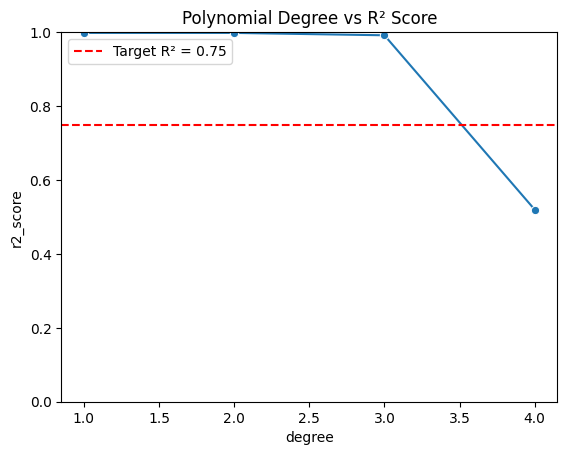

In [109]:
sns.lineplot(data=r2_df, x='degree', y='r2_score', marker="o")
plt.title("Polynomial Degree vs R² Score")
plt.ylim(0, 1)
plt.axhline(y=0.75, color='r', linestyle='--', label="Target R² = 0.75")
plt.legend()
plt.show()

In [110]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge R² Score: {ridge_r2:.4f}")

Ridge R² Score: 0.9979


MODEL 2(Target_Movement)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [124]:
X2 = df[[
    'open', 'high', 'low', 'close', 'volume',
    'Price Change', 'Volatility', 'Rolling_Mean_Close', 'Rolling_Std_Close',
    'vol_mean_6h', 'vol_std_6h', 'vol_max_6h', 'vol_min_6h',
    'return_mean_6h', 'return_std_6h',
    'hour', 'dayofweek', 'day'
]]
y2 = df['Target_Movement']

In [125]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [126]:
models2 = {
    "LogisticRegression": {
        "pipe": Pipeline([
            ("scale", StandardScaler()),
            ("clf", LogisticRegression(max_iter=1000))
        ]),
        "params": {
            "clf__C": [0.1, 1, 10]
        }
    },
    "PolyLog_deg2": {
        "pipe": Pipeline([
            ("poly", PolynomialFeatures(degree=2, include_bias=False)),
            ("scale", StandardScaler()),
            ("clf", LogisticRegression(max_iter=1000))
        ]),
        "params": {
            "clf__C": [0.1, 1, 10]
        }
    },
    "RandomForest": {
        "pipe": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10]
        }
    },
    "DecisionTree": {
        "pipe": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 10],
            "min_samples_leaf": [1, 3]
        }
    },
    "SVM": {
        "pipe": Pipeline([
            ("scale", StandardScaler()),
            ("clf", SVC())
        ]),
        "params": {
            "clf__C": [0.1, 1, 10],
            "clf__kernel": ["linear", "rbf"]
        }
    },
    "KNN": {
        "pipe": Pipeline([
            ("scale", StandardScaler()),
            ("clf", KNeighborsClassifier())
        ]),
        "params": {
            "clf__n_neighbors": [3, 5, 7]
        }
    },
    "NaiveBayes": {
        "pipe": GaussianNB(),
        "params": {}  # no tuning
    }
}

In [127]:
def tune_classification_model(name, pipe, params, X, y):
    grid = GridSearchCV(pipe, params, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X, y)
    return grid.best_estimator_, grid.best_score_

In [128]:
results2 = []
for name, model in models2.items():
    best_model, best_score = tune_classification_model(name, model["pipe"], model["params"], X2_train, y2_train)
    y_pred = best_model.predict(X2_test)
    acc = accuracy_score(y2_test, y_pred)
    
    results2.append({
        "model": name,
        "cv_accuracy": round(best_score * 100, 2),
        "test_accuracy": round(acc * 100, 2)
    })
    
    print(f"🔍 {name} Report:")
    print(classification_report(y2_test, y_pred))
    print("-" * 50)

🔍 LogisticRegression Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       441
           1       0.69      0.70      0.69       432

    accuracy                           0.69       873
   macro avg       0.69      0.69      0.69       873
weighted avg       0.69      0.69      0.69       873

--------------------------------------------------
🔍 PolyLog_deg2 Report:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       441
           1       0.66      0.72      0.69       432

    accuracy                           0.68       873
   macro avg       0.68      0.68      0.68       873
weighted avg       0.68      0.68      0.68       873

--------------------------------------------------
🔍 RandomForest Report:
              precision    recall  f1-score   support

           0       0.64      0.55      0.59       441
           1       0.60      0.69      0.64       432

    a

In [129]:
results_df2 = pd.DataFrame(results2).sort_values(by="test_accuracy", ascending=False).reset_index(drop=True)
print("\n📊 Model Comparison for Target_Movement:")
print(results_df2)


📊 Model Comparison for Target_Movement:
                model  cv_accuracy  test_accuracy
0  LogisticRegression        70.27          69.30
1                 SVM        70.52          69.19
2        PolyLog_deg2        70.70          67.93
3        RandomForest        62.10          61.86
4        DecisionTree        58.92          61.05
5                 KNN        52.48          52.00
6          NaiveBayes        49.58          51.43


LOOP

In [130]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

In [131]:
models2 = {
    "LogisticRegression": {
        "pipe": Pipeline([
            ("scale", StandardScaler()),
            ("clf", LogisticRegression(max_iter=1000))
        ]),
        "params": {
            "clf__C": [0.1, 1, 10]
        }
    },
    "PolyLog_deg2": {
        "pipe": Pipeline([
            ("poly", PolynomialFeatures(degree=2, include_bias=False)),
            ("scale", StandardScaler()),
            ("clf", LogisticRegression(max_iter=1000))
        ]),
        "params": {
            "clf__C": [0.1, 1, 10]
        }
    },
    "RandomForest": {
        "pipe": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10]
        }
    },
    "DecisionTree": {
        "pipe": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 10],
            "min_samples_leaf": [1, 3]
        }
    },
    "SVM": {
        "pipe": Pipeline([
            ("scale", StandardScaler()),
            ("clf", SVC())
        ]),
        "params": {
            "clf__C": [0.1, 1, 10],
            "clf__kernel": ["linear", "rbf"]
        }
    },
    "KNN": {
        "pipe": Pipeline([
            ("scale", StandardScaler()),
            ("clf", KNeighborsClassifier())
        ]),
        "params": {
            "clf__n_neighbors": [3, 5, 7]
        }
    },
    "NaiveBayes": {
        "pipe": GaussianNB(),
        "params": {}
    }
}

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
def tune_models(models_dict, X_train, y_train):
    results = []

    for name, config in models_dict.items():
        print(f"🔍 Tuning: {name}")
        grid = GridSearchCV(
            estimator=config['pipe'],
            param_grid=config['params'],
            cv=3,
            scoring='accuracy',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_score = grid.best_score_
        best_params = grid.best_params_

        results.append({
            "model": name,
            "cv_accuracy": best_score * 100,
            "best_estimator": best_model,
            "best_params": best_params
        })

    return pd.DataFrame(results).sort_values(by="cv_accuracy", ascending=False).reset_index(drop=True)

In [134]:
results_df2 = tune_models(models2, X_train2, y_train2)

🔍 Tuning: LogisticRegression
🔍 Tuning: PolyLog_deg2
🔍 Tuning: RandomForest
🔍 Tuning: DecisionTree
🔍 Tuning: SVM
🔍 Tuning: KNN
🔍 Tuning: NaiveBayes


In [135]:
print("\n🔧 Model 2 Tuning Results:")
print(results_df2[["model", "cv_accuracy", "best_params"]])


🔧 Model 2 Tuning Results:
                model  cv_accuracy                               best_params
0        PolyLog_deg2    69.550448                            {'clf__C': 10}
1                 SVM    69.550128   {'clf__C': 10, 'clf__kernel': 'linear'}
2  LogisticRegression    69.406992                            {'clf__C': 10}
3        RandomForest    63.677720    {'max_depth': 10, 'n_estimators': 200}
4        DecisionTree    58.722726  {'max_depth': 10, 'min_samples_leaf': 3}
5                 KNN    52.133830                   {'clf__n_neighbors': 7}
6          NaiveBayes    50.472792                                        {}


In [136]:
best_model2 = results_df2.loc[0, "best_estimator"]
y2_pred = best_model2.predict(X_test2)
final_acc = accuracy_score(y_test2, y2_pred)
print(f"\n✅ Best Model Test Accuracy: {final_acc * 100:.2f}%")


✅ Best Model Test Accuracy: 71.94%


MODEL 3(vol_regime)

In [137]:
X3 = df[['open', 'high', 'low', 'close', 'volume',
         'Price Change', 'Volatility', 'Rolling_Mean_Close', 'Rolling_Std_Close',
         'vol_mean_6h', 'vol_std_6h', 'vol_max_6h', 'vol_min_6h',
         'return_mean_6h', 'return_std_6h', 'hour', 'dayofweek', 'day']]
y3 = df['vol_regime']

In [138]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)

In [139]:
models3 = {
    "LogisticRegression": {
        "pipe": Pipeline([
            ("scale", StandardScaler()),
            ("clf", LogisticRegression(max_iter=1000))
        ]),
        "params": {
            "clf__C": [0.1, 1, 10]
        }
    },
    "PolyLog_deg2": {
        "pipe": Pipeline([
            ("poly", PolynomialFeatures(degree=2, include_bias=False)),
            ("scale", StandardScaler()),
            ("clf", LogisticRegression(max_iter=1000))
        ]),
        "params": {
            "clf__C": [0.1, 1, 10]
        }
    },
    "RandomForest": {
        "pipe": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10]
        }
    },
    "DecisionTree": {
        "pipe": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 10],
            "min_samples_leaf": [1, 3]
        }
    },
    "SVM": {
        "pipe": Pipeline([
            ("scale", StandardScaler()),
            ("clf", SVC())
        ]),
        "params": {
            "clf__C": [0.1, 1, 10],
            "clf__kernel": ["linear", "rbf"]
        }
    },
    "KNN": {
        "pipe": Pipeline([
            ("scale", StandardScaler()),
            ("clf", KNeighborsClassifier())
        ]),
        "params": {
            "clf__n_neighbors": [3, 5, 7]
        }
    },
    "NaiveBayes": {
        "pipe": GaussianNB(),
        "params": {}
    }
}

In [140]:
def tune_models(models_dict, X_train, y_train):
    results = []

    for name, config in models_dict.items():
        print(f"🔍 Tuning: {name}")
        grid = GridSearchCV(
            estimator=config['pipe'],
            param_grid=config['params'],
            cv=3,
            scoring='accuracy',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_score = grid.best_score_
        best_params = grid.best_params_

        results.append({
            "model": name,
            "cv_accuracy": best_score * 100,
            "best_estimator": best_model,
            "best_params": best_params
        })

    return pd.DataFrame(results).sort_values(by="cv_accuracy", ascending=False).reset_index(drop=True)

In [141]:
results_df3 = tune_models(models3, X_train3, y_train3)

🔍 Tuning: LogisticRegression
🔍 Tuning: PolyLog_deg2
🔍 Tuning: RandomForest
🔍 Tuning: DecisionTree
🔍 Tuning: SVM
🔍 Tuning: KNN
🔍 Tuning: NaiveBayes


In [142]:
print("\n🔧 Model 3 Tuning Results:")
print(results_df3[["model", "cv_accuracy", "best_params"]])


🔧 Model 3 Tuning Results:
                model  cv_accuracy                               best_params
0        PolyLog_deg2    75.222201                             {'clf__C': 1}
1        RandomForest    74.792081  {'max_depth': None, 'n_estimators': 200}
2                 SVM    74.706269      {'clf__C': 10, 'clf__kernel': 'rbf'}
3  LogisticRegression    73.732442                             {'clf__C': 1}
4                 KNN    71.984755                   {'clf__n_neighbors': 7}
5        DecisionTree    69.493248  {'max_depth': 10, 'min_samples_leaf': 1}
6          NaiveBayes    67.688139                                        {}


In [143]:
best_model3 = results_df3.loc[0, "best_estimator"]
y3_pred = best_model3.predict(X_test3)
final_acc = accuracy_score(y_test3, y3_pred)
print(f"\n✅ Best Model Test Accuracy: {final_acc * 100:.2f}%")


✅ Best Model Test Accuracy: 72.74%
